In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
#from fcmeans import FCM

In [2]:
df = pd.read_csv('student_simulation.csv')
df

,gender,race,international_stu,technical_skill,reading_score,Teamwork,Empathy_skills,Self-control,Ability_to_compromise,Ability_to_teach,Respect_for_others,Openness_to_Criticism,Sensitivity_and_Tact,Gaining_trust,Comfort_with_Differences,Listening_Skills
0,female,white,domestic,no,4,58,101,67,65,89,102,92,85,85,88,87
1,male,white,domestic,no,1,83,81,79,73,77,65,79,71,70,82,93
2,male,white,domestic,no,1,88,66,71,88,71,78,85,71,81,68,75
3,male,Hispanic and Latino,domestic,no,3,83,66,84,80,85,82,92,81,76,81,85
4,female,Hispanic and Latino,domestic,no,3,80,80,74,74,67,96,69,74,74,88,77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,male,white,domestic,yes,4,88,79,77,85,88,74,79,70,58,82,85
296,male,Hispanic and Latino,domestic,yes,4,82,62,77,60,92,70,91,89,72,70,83
297,female,white,domestic,yes,3,72,81,76,64,60,82,75,75,86,91,78
298,male,white,domestic,no,3,77,85,68,82,85,86,63,73,72,81,84


In [24]:
dt = pd.get_dummies(data=df,columns=['gender','international_stu','technical_skill','race'],drop_first=True)
dt
scaler = StandardScaler()
ds = scaler.fit_transform(dt)
ds

array([[ 0.74717756, -2.50937488,  2.40435752, ..., -0.37507921,
        -0.25264558,  0.87447463],
       [-1.88991971,  0.36702916,  0.17810056, ..., -0.37507921,
        -0.25264558,  0.87447463],
       [-1.88991971,  0.94230996, -1.49159216, ..., -0.37507921,
        -0.25264558,  0.87447463],
       ...,
       [-0.13185486, -0.89858862,  0.17810056, ..., -0.37507921,
        -0.25264558,  0.87447463],
       [-0.13185486, -0.32330781,  0.62335195, ..., -0.37507921,
        -0.25264558,  0.87447463],
       [ 0.74717756,  1.51759077, -0.37846368, ..., -0.37507921,
        -0.25264558,  0.87447463]])

In [7]:
kmeans = KMeans(n_clusters= 5)
 
#predict the labels of clusters.
label = kmeans.fit_predict(ds)
 
print(label)

[0 0 0 0 0 2 4 4 1 4 0 0 4 2 1 0 4 0 4 0 4 4 0 4 3 4 0 0 4 0 0 0 4 4 4 4 1
 0 4 4 4 4 4 0 0 0 0 4 4 4 0 1 0 4 4 4 0 0 3 4 0 4 4 4 3 0 2 3 4 0 4 0 0 0
 0 0 1 4 1 4 0 0 0 1 0 1 0 0 4 1 2 4 0 1 0 3 1 4 4 4 0 3 4 1 4 1 4 4 3 0 4
 3 3 4 4 4 0 0 4 0 1 1 4 0 4 4 4 1 0 4 4 4 0 4 4 0 0 1 0 0 4 2 4 0 1 3 2 4
 4 4 1 4 0 3 4 4 4 0 4 0 4 4 4 4 2 4 4 1 4 2 0 2 0 1 4 2 4 4 2 4 0 0 4 0 4
 3 4 0 3 1 4 4 4 4 0 4 4 0 2 2 0 0 0 1 0 0 3 1 3 4 0 0 3 1 4 0 0 1 2 4 4 4
 2 1 1 4 0 0 0 1 1 2 2 4 4 3 1 4 0 4 3 0 0 4 4 4 4 4 4 1 0 1 4 4 1 4 0 4 4
 0 0 0 0 4 0 0 0 0 3 0 4 1 4 0 1 3 4 3 0 4 4 2 4 0 0 4 4 0 4 4 0 4 0 0 1 4
 0 0 4 0]


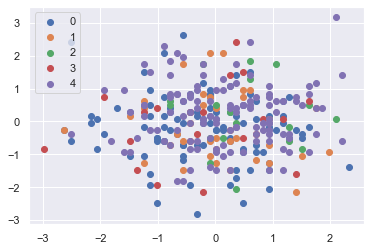

In [8]:
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(ds[label == i , 1] , ds[label == i , 2] , label = i)
plt.legend()
plt.show()